# Use decision trees to prepare a model on fraud data 
    treating those who have taxable_income <= 30000 as "Risky" and others       are "Good"

    Data Description :

    Undergrad : person is under graduated or not
    Marital.Status : marital status of a person
    Taxable.Income : Taxable income is the amount of how much tax an           individual owes to the government 
    Work Experience : Work experience of an individual person
    Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Fraud_check.csv')
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [3]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

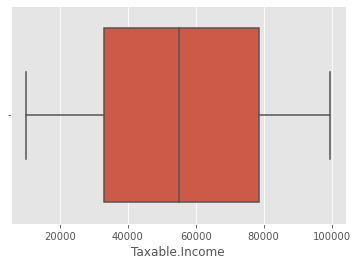

In [7]:
sns.boxplot(df['Taxable.Income'])

# There are no outliers in the data

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population'>

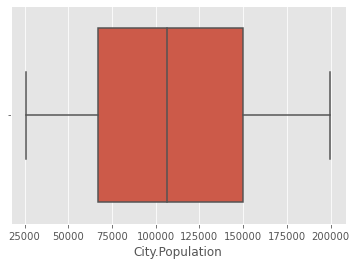

In [8]:
sns.boxplot(df['City.Population'])

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience'>

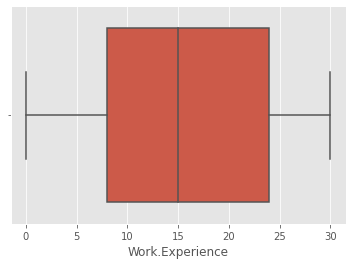

In [9]:
sns.boxplot(df['Work.Experience'])

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


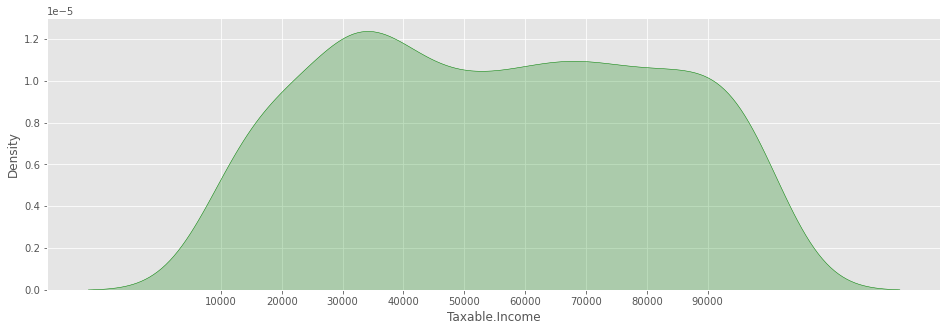

In [11]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

# The data is skewed on the right and it has negative Kurtosis

In [14]:
df1=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])

In [15]:
corel=df1.corr()

In [16]:
corel

Taxable.Income  City.Population  Work.Experience  \
Taxable.Income                 1.000000        -0.064387        -0.001818   
City.Population               -0.064387         1.000000         0.013135   
Work.Experience               -0.001818         0.013135         1.000000   
Undergrad_NO                   0.049232        -0.079579         0.005362   
Undergrad_YES                 -0.049232         0.079579        -0.005362   
Marital.Status_Divorced        0.062099         0.004925        -0.014833   
Marital.Status_Married        -0.100611        -0.007035         0.033347   
Marital.Status_Single          0.037910         0.002087        -0.018123   
Urban_NO                      -0.070628         0.040098         0.094559   
Urban_YES                      0.070628        -0.040098        -0.094559   

                         Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  \
Taxable.Income               0.049232      -0.049232                 0.062099   
City.Population             -0.079579       0.079579                 0.004925   
Work.Experience              0.005362      -0.005362                -0.014833   
Undergrad_NO                 1.000000      -1.000000                 0.045101   
Undergrad_YES               -1.000000       1.000000                -0.045101   
Marital.Status_Divorced      0.045101      -0.045101                 1.000000   
Marital.Status_Married      -0.015120       0.015120                -0.468757   
Marital.Status_Single       -0.028883       0.028883                -0.510435   
Urban_NO                    -0.000267       0.000267                 0.065518   
Urban_YES                    0.000267      -0.000267                -0.065518   

                         Marital.Status_Married  Marital.Status_Single  \
Taxable.Income                        -0.100611               0.037910   
City.Population                       -0.007035               0.002087   
Work.Experience                        0.033347              -0.018123   
Undergrad_NO                          -0.015120              -0.028883   
Undergrad_YES                          0.015120               0.028883   
Marital.Status_Divorced               -0.468757              -0.510435   
Marital.Status_Married                 1.000000              -0.520317   
Marital.Status_Single                 -0.520317               1.000000   
Urban_NO                              -0.016771              -0.047014   
Urban_YES                              0.016771               0.047014   

                         Urban_NO  Urban_YES  
Taxable.Income          -0.070628   0.070628  
City.Population          0.040098  -0.040098  
Work.Experience          0.094559  -0.094559  
Undergrad_NO            -0.000267   0.000267  
Undergrad_YES            0.000267  -0.000267  
Marital.Status_Divorced  0.065518  -0.065518  
Marital.Status_Married  -0.016771   0.016771  
Marital.Status_Single   -0.047014   0.047014  
Urban_NO                 1.000000  -1.000000  
Urban_YES               -1.000000   1.000000

<AxesSubplot:>

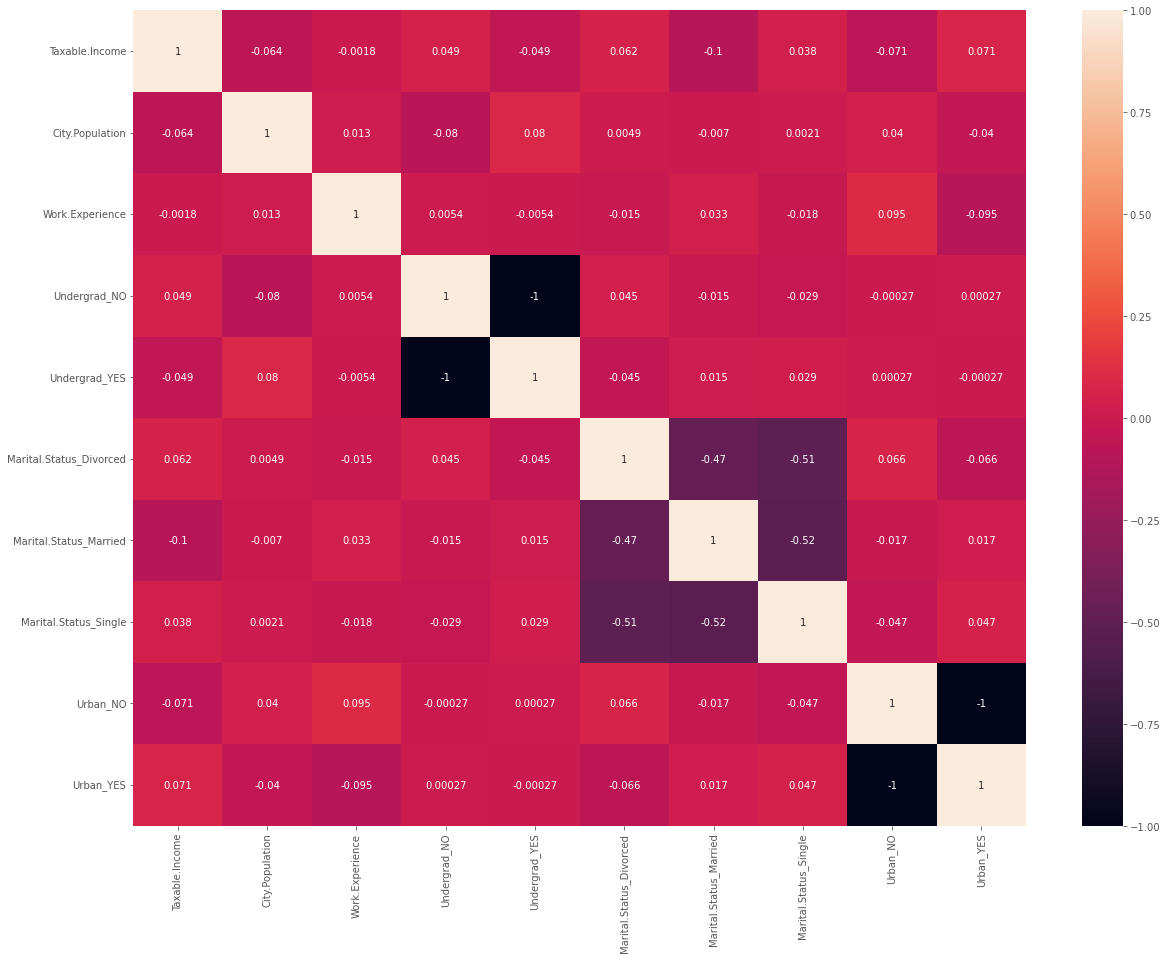

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(data=corel,
           annot=True,
           vmin=-1,
           vmax=1)

In [24]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [25]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [27]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [34]:
df.drop(['Urban','Undergrad'],axis=1,inplace=True)

In [35]:
# seggregate the data into features and target
X = df.drop('Marital.Status', axis=1)
y = df['Marital.Status']

In [36]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
y_train.value_counts()

Single      180
Married     156
Divorced    144
Name: Marital.Status, dtype: int64

In [38]:
y_test.value_counts()

Divorced    45
Married     38
Single      37
Name: Marital.Status, dtype: int64

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# create a decision tree classifier & fit the model on training dataset
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [42]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(400,300))
plot_tree(dtree, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True);

In [43]:
# predict on the train data & test data
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

In [44]:
pred_test

array(['Single', 'Divorced', 'Divorced', 'Divorced', 'Single', 'Divorced',
       'Divorced', 'Single', 'Divorced', 'Single', 'Single', 'Single',
       'Married', 'Single', 'Divorced', 'Married', 'Divorced', 'Single',
       'Single', 'Single', 'Single', 'Single', 'Single', 'Married',
       'Divorced', 'Divorced', 'Single', 'Divorced', 'Married', 'Single',
       'Married', 'Married', 'Married', 'Single', 'Divorced', 'Divorced',
       'Divorced', 'Single', 'Married', 'Married', 'Single', 'Married',
       'Married', 'Divorced', 'Divorced', 'Married', 'Single', 'Married',
       'Married', 'Single', 'Married', 'Divorced', 'Single', 'Single',
       'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Married',
       'Divorced', 'Single', 'Single', 'Married', 'Divorced', 'Single',
       'Single', 'Single', 'Single', 'Married', 'Divorced', 'Divorced',
       'Single', 'Single', 'Single', 'Married', 'Single', 'Divorced',
       'Married', 'Married', 'Single', 'Single', 'Divorced',

In [45]:
pred_train

array(['Divorced', 'Divorced', 'Married', 'Divorced', 'Divorced',
       'Single', 'Married', 'Single', 'Single', 'Single', 'Married',
       'Single', 'Married', 'Divorced', 'Single', 'Married', 'Married',
       'Divorced', 'Divorced', 'Single', 'Divorced', 'Married',
       'Divorced', 'Married', 'Single', 'Single', 'Divorced', 'Divorced',
       'Single', 'Single', 'Divorced', 'Married', 'Married', 'Divorced',
       'Married', 'Single', 'Divorced', 'Single', 'Married', 'Married',
       'Divorced', 'Married', 'Divorced', 'Single', 'Single', 'Single',
       'Single', 'Married', 'Divorced', 'Single', 'Married', 'Single',
       'Married', 'Married', 'Married', 'Divorced', 'Married', 'Married',
       'Married', 'Single', 'Married', 'Single', 'Divorced', 'Married',
       'Divorced', 'Married', 'Married', 'Divorced', 'Divorced',
       'Married', 'Divorced', 'Single', 'Single', 'Single', 'Divorced',
       'Married', 'Married', 'Married', 'Married', 'Single', 'Divorced',
       'Mar

<Figure size 2880x2160 with 0 Axes>

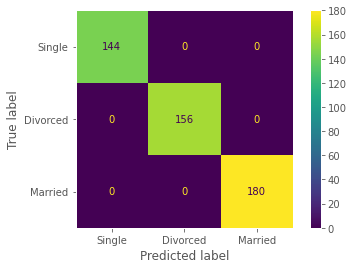

In [46]:
# plot confusion matrix for train data
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(40,30))
ConfusionMatrixDisplay.from_predictions(y_train, pred_train, display_labels=y.unique())
plt.grid(False);

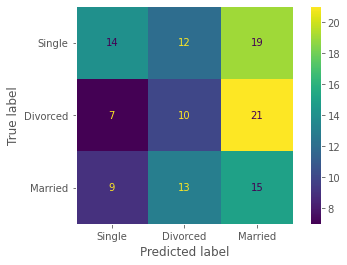

In [47]:
# plot confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=y.unique())
plt.grid(False);

In [48]:
acc_train = accuracy_score(y_train, pred_train)
acc_train

1.0

In [49]:
acc_test = accuracy_score(y_test, pred_test)
acc_test

0.325

In [50]:
# create a fresh tree model with criterion as entropy & get predictions on train and test data
dtree_ent = DecisionTreeClassifier(criterion='entropy')
dtree_ent.fit(X_train, y_train)
pred_train_ent = dtree_ent.predict(X_train)
pred_test_ent = dtree_ent.predict(X_test)

In [51]:
acc_train_ent = accuracy_score(y_train, pred_train_ent)
acc_test_ent = accuracy_score(y_test, pred_test_ent)
acc_train_ent, acc_test_ent

(1.0, 0.275)

In [52]:
# decision tree for regression. import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [54]:
df.drop(['Marital.Status'],axis=1,inplace=True)

In [55]:
# seggregate the data into features and target
X = df.drop('City.Population', axis=1)
y = df['City.Population']

In [56]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# instantiate the decision tree regressor, fit on the training data and predict on train and test data
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
pred_train_reg = dtree_reg.predict(X_train)
pred_test_reg = dtree_reg.predict(X_test)

In [58]:
# create a dataframe of the first 10 predictions vs the actual values of the test data
pd.DataFrame({'Actual': y_test[:10], 'Predicted': pred_test_reg[:10]})

Actual  Predicted
110   32450   176278.0
419  138074    58942.0
565   31064   147414.0
77   118344   124606.0
181   36116   116282.0
284  188383   110308.0
10   102602   133877.0
469   65487    39523.0
78   143153    94199.0
349   72255   129912.0

In [59]:
# compute the r2 and rmse of the model predictions on train and test data
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, pred_train_reg)
r2_test = r2_score(y_test, pred_test_reg)
r2_train, r2_test

(1.0, -1.1715424993743992)

In [60]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_reg))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_reg))
rmse_train, rmse_test

(0.0, 70963.44315396954)